In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

c:\deeplearning\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = Sequential([
    Dense(16, input_shape=(1, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [4]:
#Preprocessing Data

In [5]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [6]:
train_labels = []
train_samples = []

Example data:

      An experiemental drug was tested on individuails from age 13 to 65.
      The trial had 2100 participants. Half were under 65 years old,half were over 65 years old.
      95% of patients 65 or older experienced side effects.
      95% of patients under 65 experienced no side effects.

In [7]:
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    


In [8]:
#print raw data
for i in train_samples:
    print(i)

47
91
34
80
34
100
23
88
21
98
55
72
49
81
47
78
58
70
29
96
51
77
14
76
27
65
32
92
30
100
15
95
31
96
25
98
60
65
47
80
25
90
51
78
14
65
54
87
31
97
17
81
53
80
16
93
50
73
43
69
62
81
62
73
55
98
31
75
26
66
14
65
61
94
29
84
36
78
53
74
28
69
28
68
41
75
39
67
49
70
22
78
19
87
45
83
30
68
39
89
33
76
37
79
56
65
49
67
14
86
41
72
16
70
17
66
16
93
59
90
32
65
44
91
37
93
20
93
47
100
19
87
61
75
57
97
26
84
27
88
16
69
39
73
21
100
56
99
21
75
51
92
29
81
51
75
61
94
40
66
13
90
27
82
13
78
58
77
60
80
45
91
44
99
26
90
19
68
18
99
23
88
24
97
23
89
56
65
48
78
30
73
55
89
16
100
21
82
63
71
14
80
40
74
18
90
50
92
46
68
26
90
27
95
16
81
40
68
35
66
33
71
31
71
16
96
35
93
43
94
47
91
24
77
44
77
43
69
57
79
36
75
28
68
52
73
23
72
37
76
61
72
27
65
23
83
39
90
55
88
18
67
18
67
48
71
49
89
54
87
21
71
13
88
19
89
30
73
43
88
43
100
25
81
40
65
37
81
34
87
34
81
58
70
34
88
23
82
25
72
32
82
46
67
62
99
21
71
32
79
62
87
30
66
63
99
63
82
39
70
55
95
52
71
35
87
28
92
43
96
40
7

In [9]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_train_samples = scaler.fit_transform((train_samples).reshape(-1, 1))

c:\deeplearning\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
for i in scaler_train_samples:
    print(i)

[0.3908046]
[0.89655172]
[0.24137931]
[0.77011494]
[0.24137931]
[1.]
[0.11494253]
[0.86206897]
[0.09195402]
[0.97701149]
[0.48275862]
[0.67816092]
[0.4137931]
[0.7816092]
[0.3908046]
[0.74712644]
[0.51724138]
[0.65517241]
[0.18390805]
[0.95402299]
[0.43678161]
[0.73563218]
[0.01149425]
[0.72413793]
[0.16091954]
[0.59770115]
[0.2183908]
[0.90804598]
[0.1954023]
[1.]
[0.02298851]
[0.94252874]
[0.20689655]
[0.95402299]
[0.13793103]
[0.97701149]
[0.54022989]
[0.59770115]
[0.3908046]
[0.77011494]
[0.13793103]
[0.88505747]
[0.43678161]
[0.74712644]
[0.01149425]
[0.59770115]
[0.47126437]
[0.85057471]
[0.20689655]
[0.96551724]
[0.04597701]
[0.7816092]
[0.45977011]
[0.77011494]
[0.03448276]
[0.91954023]
[0.42528736]
[0.68965517]
[0.34482759]
[0.64367816]
[0.56321839]
[0.7816092]
[0.56321839]
[0.68965517]
[0.48275862]
[0.97701149]
[0.20689655]
[0.71264368]
[0.14942529]
[0.6091954]
[0.01149425]
[0.59770115]
[0.55172414]
[0.93103448]
[0.18390805]
[0.81609195]
[0.26436782]
[0.74712644]
[0.45977011]

[0.33333333]
[0.88505747]
[0.04597701]
[0.74712644]
[0.49425287]
[0.71264368]
[0.33333333]
[0.7816092]
[0.31034483]
[0.71264368]
[0.43678161]
[0.91954023]
[0.17241379]
[0.97701149]
[0.10344828]
[0.68965517]
[0.42528736]
[0.74712644]
[0.]
[0.88505747]
[0.57471264]
[0.8045977]
[0.33333333]
[0.96551724]
[0.12643678]
[0.86206897]
[0.55172414]
[0.72413793]
[0.03448276]
[0.75862069]
[0.1954023]
[0.62068966]
[0.22988506]
[0.93103448]
[0.52873563]
[0.81609195]
[0.45977011]
[0.68965517]
[0.29885057]
[0.82758621]
[0.12643678]
[0.68965517]
[0.04597701]
[0.97701149]
[0.08045977]
[0.75862069]
[0.42528736]
[0.79310345]
[0.14942529]
[0.89655172]
[0.06896552]
[0.82758621]
[0.17241379]
[0.87356322]
[0.5862069]
[0.74712644]
[0.17241379]
[0.85057471]
[0.36781609]
[0.73563218]
[0.45977011]
[0.7816092]
[0.47126437]
[0.81609195]
[0.49425287]
[0.64367816]
[0.1954023]
[0.63218391]
[0.02298851]
[1.]
[0.51724138]
[0.7816092]
[0.47126437]
[0.90804598]
[0.52873563]
[0.6091954]
[0.57471264]
[0.83908046]
[0.0229885

[0.55172414]
[0.66666667]
[0.26436782]
[0.94252874]
[0.5862069]
[0.73563218]
[0.43678161]
[0.91954023]
[0.36781609]
[0.97701149]
[0.50574713]
[0.72413793]
[0.02298851]
[0.96551724]
[0.01149425]
[0.96551724]
[0.40229885]
[0.96551724]
[0.32183908]
[0.62068966]
[0.54022989]
[0.91954023]
[0.18390805]
[0.96551724]
[0.44827586]
[0.75862069]
[0.01149425]
[0.79310345]
[0.26436782]
[0.64367816]
[0.09195402]
[0.97701149]
[0.20689655]
[0.81609195]
[0.04597701]
[0.81609195]
[0.32183908]
[0.88505747]
[0.34482759]
[0.89655172]
[0.01149425]
[0.91954023]
[0.44827586]
[0.67816092]
[0.50574713]
[0.75862069]
[0.43678161]
[0.71264368]
[0.27586207]
[0.87356322]
[0.32183908]
[0.72413793]
[0.28735632]
[0.71264368]
[0.20689655]
[0.77011494]
[0.25287356]
[0.96551724]
[0.25287356]
[0.89655172]
[0.18390805]
[0.81609195]
[0.52873563]
[0.67816092]
[0.3908046]
[0.75862069]
[0.56321839]
[0.75862069]
[0.49425287]
[0.98850575]
[0.45977011]
[0.87356322]
[0.03448276]
[0.8045977]
[0.29885057]
[0.96551724]
[0.32183908]
[0

In [12]:
model.compile(Adam(lr=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(scaler_train_samples, train_labels, validation_split=0.1, batch_size=20, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 3s - loss: 0.6312 - acc: 0.6344 - val_loss: 0.5432 - val_acc: 0.8143
Epoch 2/20
 - 1s - loss: 0.4840 - acc: 0.8312 - val_loss: 0.3652 - val_acc: 0.9286
Epoch 3/20
 - 1s - loss: 0.3578 - acc: 0.8974 - val_loss: 0.2494 - val_acc: 0.9952
Epoch 4/20
 - 1s - loss: 0.3011 - acc: 0.9270 - val_loss: 0.1866 - val_acc: 0.9714
Epoch 5/20
 - 1s - loss: 0.2830 - acc: 0.9312 - val_loss: 0.1622 - val_acc: 0.9619
Epoch 6/20
 - 1s - loss: 0.2754 - acc: 0.9312 - val_loss: 0.1481 - val_acc: 0.9810
Epoch 7/20
 - 1s - loss: 0.2688 - acc: 0.9370 - val_loss: 0.1469 - val_acc: 0.9952
Epoch 8/20
 - 1s - loss: 0.2654 - acc: 0.9370 - val_loss: 0.1331 - val_acc: 0.9810
Epoch 9/20
 - 1s - loss: 0.2626 - acc: 0.9344 - val_loss: 0.1355 - val_acc: 1.0000
Epoch 10/20
 - 1s - loss: 0.2596 - acc: 0.9413 - val_loss: 0.1386 - val_acc: 0.9952
Epoch 11/20
 - 1s - loss: 0.2575 - acc: 0.9402 - val_loss: 0.1220 - val_acc: 0.9952
Epoch 12/20
 - 1s - loss: 0.2562 - acc

In [14]:
predictions = model.predict(scaler_train_samples,batch_size=10, verbose=1)

2100/2100 [==============================] - 0s 123us/step


In [15]:
for i in predictions:
    print(i)

[0.9409075  0.05909253]
[0.01895837 0.9810416 ]
[0.9536248  0.04637519]
[0.067128 0.932872]
[0.9536248  0.04637519]
[0.00654793 0.9934521 ]
[0.9551311  0.04486893]
[0.0269143 0.9730857]
[0.95539993 0.04460011]
[0.00830137 0.9916986 ]
[0.90396976 0.09603025]
[0.15768974 0.84231025]
[0.93790275 0.06209726]
[0.06001975 0.9399802 ]
[0.9409075  0.05909253]
[0.0837364  0.91626364]
[0.84677374 0.15322623]
[0.19394805 0.80605197]
[0.9543154  0.04568465]
[0.01051936 0.9894806 ]
[0.9335121  0.06648792]
[0.09337445 0.9066255 ]
[0.95632863 0.04367132]
[0.10399599 0.896004  ]
[0.95458883 0.04541118]
[0.46721935 0.53278065]
[0.95390224 0.04609777]
[0.01685867 0.9831413 ]
[0.9541781  0.04582195]
[0.00654793 0.9934521 ]
[0.9561971  0.04380286]
[0.01183903 0.98816097]
[0.95404035 0.04595967]
[0.01051936 0.9894806 ]
[0.95486075 0.04513928]
[0.00830137 0.9916986 ]
[0.76558465 0.23441535]
[0.46721935 0.53278065]
[0.9409075  0.05909253]
[0.067128 0.932872]
[0.95486075 0.04513928]
[0.0213139 0.9786861]
[0.9

[0.02395496 0.976045  ]
[0.9448357 0.0551643]
[0.067128 0.932872]
[0.9536248  0.04637519]
[0.04270723 0.95729274]
[0.9543154  0.04568465]
[0.46721935 0.53278065]
[0.71515894 0.28484103]
[0.0837364  0.91626364]
[0.95632863 0.04367132]
[0.05362093 0.9463791 ]
[0.5328674 0.4671327]
[0.19394805 0.80605197]
[0.95632863 0.04367132]
[0.01183903 0.98816097]
[0.9541781  0.04582195]
[0.0269143 0.9730857]
[0.95334584 0.04665415]
[0.01332201 0.986678  ]
[0.95606524 0.04393479]
[0.03393522 0.96606475]
[0.9225925  0.07740746]
[0.03807937 0.9619207 ]
[0.9435544 0.0564456]
[0.00654793 0.9934521 ]
[0.95334584 0.04665415]
[0.05362093 0.9463791 ]
[0.95499605 0.04500391]
[0.14245622 0.85754377]
[0.95458883 0.04541118]
[0.00830137 0.9916986 ]
[0.9448357 0.0551643]
[0.15768974 0.84231025]
[0.84677374 0.15322623]
[0.15768974 0.84231025]
[0.76558465 0.23441535]
[0.01498796 0.98501205]
[0.95404035 0.04595967]
[0.15768974 0.84231025]
[0.9409075  0.05909253]
[0.28491208 0.71508795]
[0.90396976 0.09603025]
[0.284

[0.067128 0.932872]
[0.9534855  0.04651447]
[0.01895837 0.9810416 ]
[0.9225925  0.07740746]
[0.07501091 0.9249891 ]
[0.95472497 0.04527504]
[0.14245622 0.85754377]
[0.9422452  0.05775483]
[0.0269143 0.9730857]
[0.9409075  0.05909253]
[0.06001975 0.9399802 ]
[0.95458883 0.04541118]
[0.12846988 0.8715301 ]
[0.95334584 0.04665415]
[0.2344779 0.7655221]
[0.76558465 0.23441535]
[0.11567149 0.88432854]
[0.9448357 0.0551643]
[0.09337445 0.9066255 ]
[0.84677374 0.15322623]
[0.067128 0.932872]
[0.9473165  0.05268347]
[0.07501091 0.9249891 ]
[0.95539993 0.04460011]
[0.2344779 0.7655221]
[0.9335121  0.06648792]
[0.12846988 0.8715301 ]
[0.5973971 0.4026029]
[0.15768974 0.84231025]
[0.9534855  0.04651447]
[0.00830137 0.9916986 ]
[0.92911553 0.07088444]
[0.03393522 0.96606475]
[0.9551311  0.04486893]
[0.03022788 0.9697721 ]
[0.95334584 0.04665415]
[0.00830137 0.9916986 ]
[0.95458883 0.04541118]
[0.01895837 0.9810416 ]
[0.9551311  0.04486893]
[0.11567149 0.88432854]
[0.9335121  0.06648792]
[0.0933744

In [18]:
rounded_predictions = model.predict_classes(scaler_train_samples, batch_size=10, verbose=0)

In [19]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [20]:
#Confusion matrix

In [21]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
test_labels = np.array(train_labels)

In [24]:
test_samples = np.array(train_samples)

In [25]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [33]:
def plot_confusion_matrix(cm, classes, normalize=False, title="confusion_matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True_label')
    plt.xlabel('predicted label')
                

Confusion matrix, without normalization
[[1000   50]
 [  50 1000]]


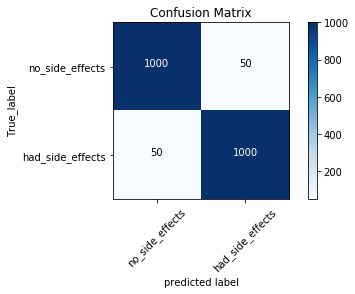

In [34]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [35]:
#Model save and load

In [36]:
model.save("D:\jupyter\Keras_tutorial\model\medical_trial_model.h5")

In [37]:
from keras.models import load_model

In [38]:
new_model = load_model("D:\jupyter\Keras_tutorial\model\medical_trial_model.h5")

In [39]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [40]:
new_model.get_weights()

[array([[-0.05415392, -0.48541096,  0.53202236, -0.35140806, -0.55337137,
         -0.05106014,  0.47294495, -0.08470529,  0.7722928 , -0.36133406,
          0.54400396,  0.6282312 , -0.07703617, -0.22075123, -0.05022222,
          0.29876238]], dtype=float32),
 array([ 0.        ,  0.        , -0.2299986 ,  0.        ,  0.        ,
         0.        , -0.23643793,  0.        , -0.21186839,  0.        ,
        -0.24824777, -0.2789072 ,  0.2721409 ,  0.        ,  0.        ,
        -0.12162255], dtype=float32),
 array([[-5.57789207e-03, -3.46906841e-01,  2.24775225e-01,
         -7.35394955e-02,  2.96263367e-01,  1.13818407e-01,
         -1.45133600e-01,  3.00278097e-01, -2.63321102e-01,
          6.50961399e-02, -8.71514082e-02, -1.32452711e-01,
          1.97320431e-01, -2.14462891e-01, -5.76089323e-02,
          6.81254268e-03,  3.47817093e-01, -5.00014126e-02,
         -1.96398824e-01, -4.30067182e-02,  2.35943705e-01,
         -3.24229300e-01, -2.37164497e-02, -1.40273482e-01,
 

In [42]:
new_model.optimizer

2.model to json()
#save the only architecture of a model

In [45]:
#save to json
json_string = model.to_json()

In [46]:
#save as YAML
yaml_string = model.to_yaml()

In [47]:
json_string

'{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "b

In [50]:
#model reconstruction from json:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [53]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


3.model.save_weights()
#Only save the weighs of a model.

In [54]:
model.save_weights("D:\jupyter\Keras_tutorial\model\my_model_weights.h5")

In [56]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [57]:
model2.load_weights('D:\jupyter\Keras_tutorial\model\my_model_weights.h5')

In [58]:
model2.get_weights()

[array([[-0.05415392, -0.48541096,  0.53202236, -0.35140806, -0.55337137,
         -0.05106014,  0.47294495, -0.08470529,  0.7722928 , -0.36133406,
          0.54400396,  0.6282312 , -0.07703617, -0.22075123, -0.05022222,
          0.29876238]], dtype=float32),
 array([ 0.        ,  0.        , -0.2299986 ,  0.        ,  0.        ,
         0.        , -0.23643793,  0.        , -0.21186839,  0.        ,
        -0.24824777, -0.2789072 ,  0.2721409 ,  0.        ,  0.        ,
        -0.12162255], dtype=float32),
 array([[-5.57789207e-03, -3.46906841e-01,  2.24775225e-01,
         -7.35394955e-02,  2.96263367e-01,  1.13818407e-01,
         -1.45133600e-01,  3.00278097e-01, -2.63321102e-01,
          6.50961399e-02, -8.71514082e-02, -1.32452711e-01,
          1.97320431e-01, -2.14462891e-01, -5.76089323e-02,
          6.81254268e-03,  3.47817093e-01, -5.00014126e-02,
         -1.96398824e-01, -4.30067182e-02,  2.35943705e-01,
         -3.24229300e-01, -2.37164497e-02, -1.40273482e-01,
 